# Task 3 - Modeling

This notebook will get you started by helping you to load the data, but then it'll be up to you to complete the task! If you need help, refer to the `modeling_walkthrough.ipynb` notebook.


## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We want to use dataframes once again to store and manipulate the data.

In [2]:
!pip install pandas

In [3]:
import pandas as pd

---

## Section 2 - Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [4]:
path = "/content/drive/MyDrive/Projects/Cognizant AI - Forage/Task 3/"

sales_df = pd.read_csv(f"{path}sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [5]:
stock_df = pd.read_csv(f"{path}sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [6]:
temp_df = pd.read_csv(f"{path}sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


Now it's up to you, refer back to the steps in your strategic plan to complete this task. Good luck!

In [7]:
sales_df.info()
stock_df.info()
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           1

In [8]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format = '%Y-%m-%d %H:%M:%S')
  return dummy

In [9]:
sales_df = convert_to_datetime(sales_df, 'timestamp')
stock_df = convert_to_datetime(stock_df, 'timestamp')
temp_df = convert_to_datetime(temp_df, 'timestamp')

sales_df.info()
stock_df.info()
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id          

In [10]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [11]:
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [12]:
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [13]:
#Converting timestamp to hourly basis --> then merge all 3 datasets

from datetime import datetime

def convert_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  dummy[column] = dummy[column].dt.floor('H')
  return dummy

In [14]:
sales_df = convert_to_hourly(sales_df, 'timestamp')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [15]:
stock_df = convert_to_hourly(stock_df, 'timestamp')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [16]:
temp_df = convert_to_hourly(temp_df, 'timestamp')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [17]:
# Total quantity of sales by product_id depending on hour of the week
sales_merged = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity':'sum'}).reset_index()
sales_merged.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [18]:
# Average stock percentage of product depending on hour of the week
stock_merged = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct':'mean'}).reset_index()
stock_merged.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [19]:
# Average temperature of storage depending on hour of the week
temp_merged = temp_df.groupby(['timestamp']).agg({'temperature':'mean'}).reset_index()
temp_merged.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


In [20]:
df_merged = stock_merged.merge(sales_merged, on=['timestamp', 'product_id'], how='left')
df_merged.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [21]:
df_merged = df_merged.merge(temp_merged, on=['timestamp'], how='left')
df_merged.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [22]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


In [23]:
df_merged.isnull().sum()

timestamp                 0
product_id                0
estimated_stock_pct       0
quantity               7778
temperature               0
dtype: int64

In [24]:
df_merged['quantity'] = df_merged['quantity'].fillna(0)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


In [25]:
df_merged.isnull().sum()

timestamp              0
product_id             0
estimated_stock_pct    0
quantity               0
temperature            0
dtype: int64

In [26]:
product_categories = sales_df[['product_id', 'category']].drop_duplicates()
product_price = sales_df[['product_id', 'unit_price']].drop_duplicates()

In [27]:
df_merged = df_merged.merge(product_categories, on='product_id', how='left')
df_merged.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [28]:
df_merged = df_merged.merge(product_price, on='product_id', how='left')
df_merged.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 593.2+ KB


In [30]:
df_merged.describe()

,timestamp,estimated_stock_pct,quantity,temperature,unit_price
count,10845,10845.000000,10845.000000,10845.000000,10845.000000
mean,2022-03-04 14:15:38.091286272,0.505130,0.908529,-0.213678,8.938575
min,2022-03-01 09:00:00,0.010000,0.000000,-1.847270,0.190000
25%,2022-03-02 17:00:00,0.300000,0.000000,-0.657082,4.990000
50%,2022-03-04 14:00:00,0.500000,0.000000,-0.230631,8.190000
75%,2022-03-06 11:00:00,0.715000,1.000000,0.160429,12.490000
max,2022-03-07 19:00:00,1.000000,15.000000,1.435938,23.990000
std,NaN,0.264519,1.787680,0.649671,5.390235


In [32]:
# Converting timestamp into day of month, day of week, and hour categories
df_merged['day_of_month'] = df_merged['timestamp'].dt.day
df_merged['day_of_week'] = df_merged['timestamp'].dt.dayofweek
df_merged['weekday'] = df_merged['timestamp'].dt.weekday < 5
df_merged['hour'] = df_merged['timestamp'].dt.hour

# Dropping timestamp column
df_merged.drop(columns=['timestamp'], inplace=True)
df_merged.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,day_of_month,day_of_week,weekday,hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,True,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,True,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,True,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,True,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,True,9


In [33]:
# Using binary flags for category column
df_merged = pd.get_dummies(df_merged, columns=['category'])
df_merged.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,weekday,hour,category_baby products,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,True,9,False,...,False,False,False,False,False,False,False,False,False,False
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,True,9,False,...,False,False,False,False,False,False,False,False,False,True
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,True,9,True,...,False,False,False,False,False,False,False,False,False,False
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,True,9,False,...,False,False,False,False,False,False,False,False,False,False
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,True,9,False,...,False,False,False,False,True,False,False,False,False,False


In [34]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   day_of_month                    10845 non-null  int32  
 6   day_of_week                     10845 non-null  int32  
 7   weekday                         10845 non-null  bool   
 8   hour                            10845 non-null  int32  
 9   category_baby products          10845 non-null  bool   
 10  category_baked goods            10845 non-null  bool   
 11  category_baking                 10845 non-null  bool   
 12  category_beverages              

In [36]:
import numpy as np
for col in df_merged.columns:
    if df_merged[col].dtype == bool:
        df_merged[col] = df_merged[col].astype(np.uint8)

In [37]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   day_of_month                    10845 non-null  int32  
 6   day_of_week                     10845 non-null  int32  
 7   weekday                         10845 non-null  uint8  
 8   hour                            10845 non-null  int32  
 9   category_baby products          10845 non-null  uint8  
 10  category_baked goods            10845 non-null  uint8  
 11  category_baking                 10845 non-null  uint8  
 12  category_beverages              

In [38]:
df_merged.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,weekday,hour,category_baby products,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,1,9,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,1,9,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,1,9,1,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,1,9,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,1,9,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
# Drop non numeric column product_id
df_merged.drop(columns=['product_id'], inplace=True)
df_merged.head()

,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,weekday,hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,1,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,1,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,1,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
# Building model
X = df_merged.drop(columns=['estimated_stock_pct'])
y = df_merged['estimated_stock_pct']
print(X.shape)
print(y.shape)

(10845, 29)
(10845,)


In [43]:
!pip install scikit-learn

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [45]:
K = 10
split = 0.8

In [46]:
acc = []

for i in range(K):

  model = RandomForestRegressor()
  scaler = StandardScaler()

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  trained_model = model.fit(X_train, y_train)

  y_pred = trained_model.predict(X_test)

  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  acc.append(mae)
  print(f"MAE for iteration {i+1}: {mae}")

print(f"Average MAE: {np.mean(acc)}")

MAE for iteration 1: 0.23564185911875124
MAE for iteration 2: 0.2350517597349375
MAE for iteration 3: 0.23531392364267054
MAE for iteration 4: 0.23651515797822126
MAE for iteration 5: 0.23565932377403093
MAE for iteration 6: 0.23558921061933302
MAE for iteration 7: 0.23546708355470664
MAE for iteration 8: 0.23625727841628436
MAE for iteration 9: 0.23540335043030586
MAE for iteration 10: 0.23579731742372684
Average MAE: 0.2356696264692968


In [47]:
!pip install matplotlib

In [48]:
import matplotlib.pyplot as plt

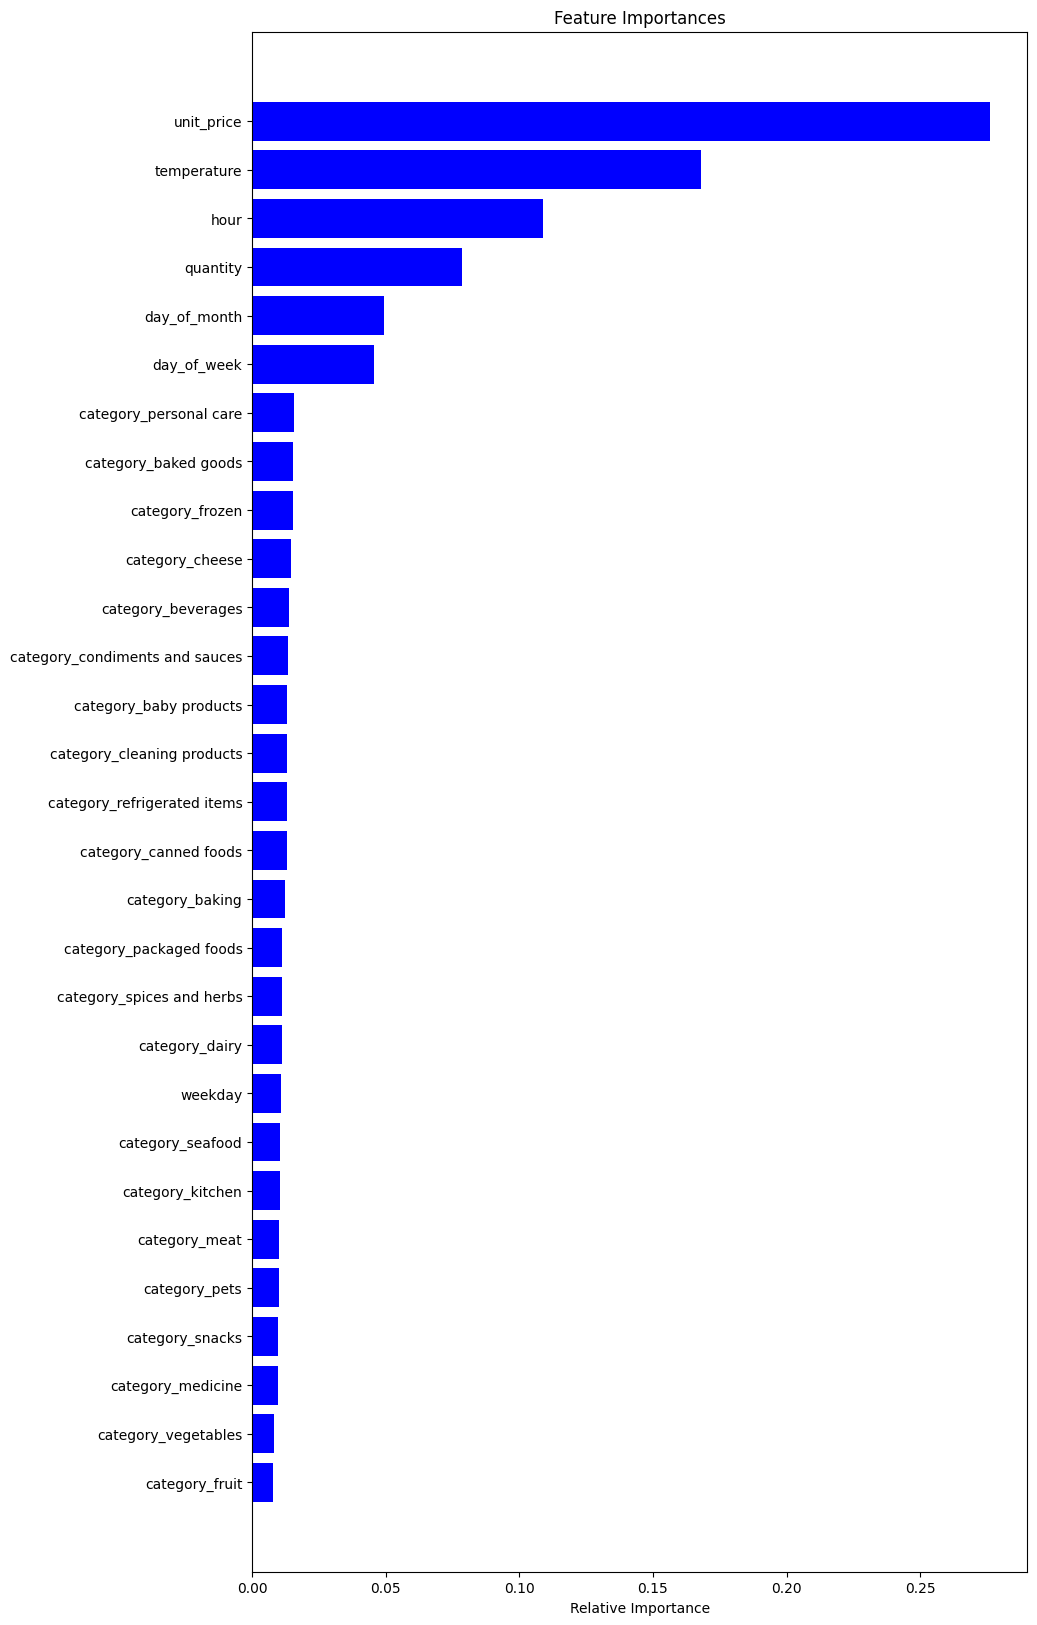

In [50]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()